### About this dataset
What is Autism?
Austim, or Austism Spectrum Disorder (ASD), refers to a broad range of conditions charaterized by challenges with social skills, repetitive behaviors, speech and non-verbal communication.

Data Source - https://www.kaggle.com/c/autism-prediction/data

#### Causes and Challenges
It is mostly influenced by a combination of genetic and environmental factors. Because autism is a spectrum disorder, each person with autism has a distinct set of strengths and challenges. The ways in which people with autism learn, think and solve problems can range from highly skilled to severely challenged.
Research has made clear that quality and early intervention can improve learning, communication and social skills, as well as underlying brain development although the diagnostic process can take several years.

#### The Role of Machine Learning
This dataset is composed of survey results for more than 700 people who filled an app form. There are labels portraying whether the person received a diagnosis of autism, allowing machine learning models to predict the likelihood of having autism, thereby allowing healthcare professionals prioritize their resources.

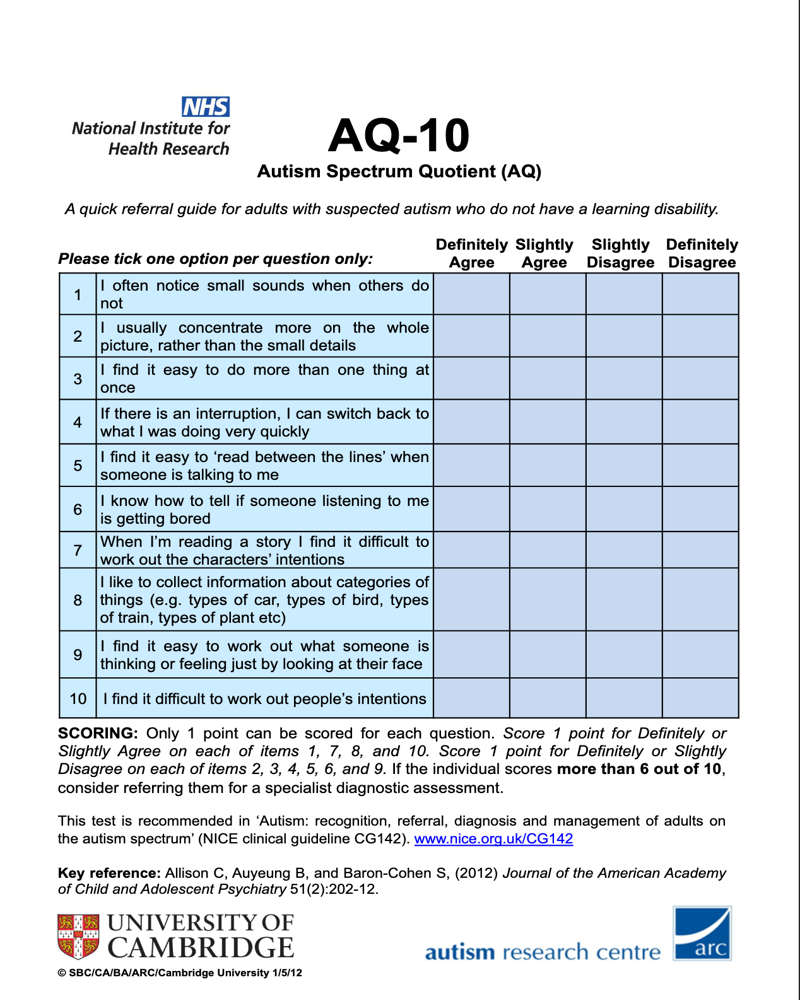

#### Data Description

* ID - ID of the patient.
* A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool.
* Age - Age of the patient in years.
* Gender - Gender of the patient.
* Ethnicity - Ethnicity of the patient.
* Jaundice - Whether the patient had jaundice at the time of birth.
* Autism - Whether an immediate family member has been diagnosed with autism.
* Country_of_Res - Country of residence of the patient.
* Used_App_Before - Whether the patient has undergone a screening test before.
* Result - Score for AQ1-10 screening test.
* Age_Desc - Age of the patient.
* Relation - Relation of patient who completed the test.
* Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column.

Four important processes in data analysis will be covered in this notebook as we do various forms of data analysis to find a solution to the issue.

1. Descriptive Analysis - Charts and numbers will be used in descriptive analysis to explain what is happening with our data records.

2. Diagonistics Analysis - Finding links between the variables in the dataset will need correlation and statistical inference.

3. Predictive Analysis - To do this, predictions for next terms will be made using machine learning.

4. Prescriptive Analysis - This will aid in the decision-making process when using our prediction model to address business issues.

### Methodology in solving the proplem

These are the major steps for building data science models:

1. Identify the business problem.

2. Organize our data set.

3. Data Exploration and Data Visualization.

4. Data Cleaning and Transformation.

5. Statistical Inference.

6. Feature selection.

7. Creating our training and validation data. 

8. Evaluation of the model.

9. Making prediction on our test data.

10. Making decision from the model to solve the business problem.

To decide whether to diagnose the unseen patient autistic or not, we must establish a decision limit based on the probability for each patient.

**Note: Records predicted as 1—that is, as belonging to the class of interest—are anticipated for fewer records.**

### Problem Statement

We are facing a rare case issue where by:

76.875% of the total number of patients don't have Autism.

23.125% of the total number of patients have Autism.

It is proper and life saving when we have a model that correctly predicts the 1's in the model than 0's.

In the real sense, it is better to say a patient is sick when it is false (Type error) than saying the patient is not sick when it is true (Type error).

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics
import pickle #For model deployment

## For statistical test
from scipy.stats import chisquare, chi2_contingency
from sklearn.feature_selection import chi2

## Machine Learning Libraryfrom sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from dmba import classificationSummary

#Other libraries and settings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
df_train = pd.read_csv('train.csv') #train data
test = pd.read_csv('test.csv') #test data

Data Exploration

In [3]:
df_train.head() #The first five rows in the training data

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [4]:
df_train.shape

(800, 22)

In [5]:
df_train.describe() ##Summary statistics of the integer or float variables in the dataset

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [6]:
df_train.isna().sum() #The training data has no missing values

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [7]:
print('we have {} rows in our training set'.format(df_train.shape[0]))
print('we have {} columns in our training set'.format(df_train.shape[1]))

we have 800 rows in our training set
we have 22 columns in our training set


In [8]:
print('we have {} rows in our test set'.format(test.shape[0]))
print('we have {} columns in our test set'.format(test.shape[1]))

we have 200 rows in our test set
we have 21 columns in our test set


In [9]:
integer_train = df_train.dtypes[df_train.dtypes == 'int64'].count()
float_train = df_train.dtypes[df_train.dtypes == 'float64'].count()
object_train = df_train.dtypes[df_train.dtypes == 'object'].count()

In [10]:
#Understanding the columns
integer_train_index = df_train.dtypes[df_train.dtypes == 'int64'].index
contineous_train_index = df_train.dtypes[df_train.dtypes == 'float64'].index
categorical_train_index = df_train.dtypes[df_train.dtypes == 'object'].index

In [11]:
print('we have {} integer train type columns'.format(integer_train))
print('we have {} float train type columns'.format(float_train))
print('we have {} object train type columns'.format(object_train))

we have 12 integer train type columns
we have 2 float train type columns
we have 8 object train type columns


In [12]:
## Value counts of each categorical column
for feature in categorical_train_index:
    print(feature,':')
    print(df_train[feature].value_counts())
    print('----------------------------')

gender :
f    415
m    385
Name: gender, dtype: int64
----------------------------
ethnicity :
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64
----------------------------
jaundice :
no     604
yes    196
Name: jaundice, dtype: int64
----------------------------
austim :
no     683
yes    117
Name: austim, dtype: int64
----------------------------
contry_of_res :
United States           148
United Arab Emirates     94
New Zealand              93
India                    74
United Kingdom           58
Australia                43
Jordan                   40
Afghanistan              23
Sri Lanka                16
Canada                   15
Netherlands              14
Austria                  12
France                   12
Italy       

In [13]:
# Value counts of each integer column
for feature in integer_train_index:
    print(feature,':')
    print(df_train[feature].value_counts())
    print('----------------------------')

ID :
1      1
538    1
528    1
529    1
530    1
      ..
270    1
271    1
272    1
273    1
800    1
Name: ID, Length: 800, dtype: int64
----------------------------
A1_Score :
1    466
0    334
Name: A1_Score, dtype: int64
----------------------------
A2_Score :
0    571
1    229
Name: A2_Score, dtype: int64
----------------------------
A3_Score :
0    543
1    257
Name: A3_Score, dtype: int64
----------------------------
A4_Score :
0    468
1    332
Name: A4_Score, dtype: int64
----------------------------
A5_Score :
0    434
1    366
Name: A5_Score, dtype: int64
----------------------------
A6_Score :
0    633
1    167
Name: A6_Score, dtype: int64
----------------------------
A7_Score :
0    581
1    219
Name: A7_Score, dtype: int64
----------------------------
A8_Score :
1    574
0    226
Name: A8_Score, dtype: int64
----------------------------
A9_Score :
0    547
1    253
Name: A9_Score, dtype: int64
----------------------------
A10_Score :
0    432
1    368
Name: A10_Score, d

In [14]:
#The patient ID and Age Description columns can be dropped as they don't have much relevance to our analysis
train = df_train.drop(['age_desc', 'ID'], axis=1)

In [15]:
train['Class/ASD'].value_counts(normalize=True) * 100 

0    76.875
1    23.125
Name: Class/ASD, dtype: float64

##### Observation 

* The train data consists of 800 rows and 22 columns.

* The test data consists of 200 rows and 21 columns.

* Our data has no missing values.

* We remove irrelevant features: ID and Age Description.

#### Descriptive Analysis

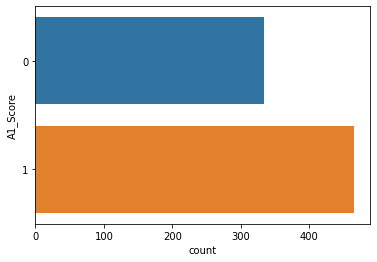

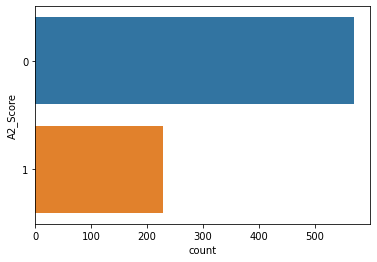

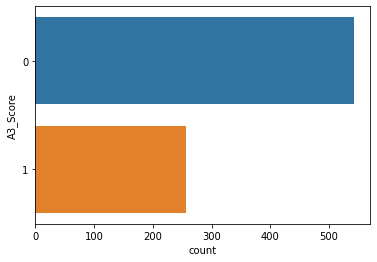

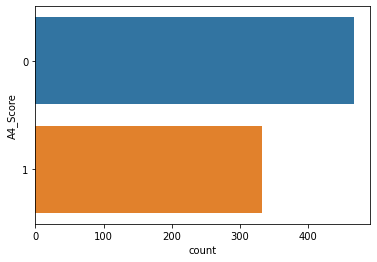

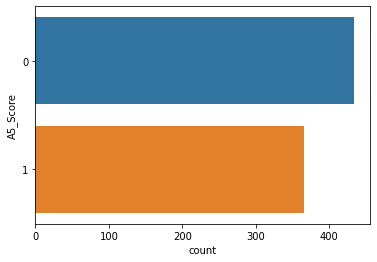

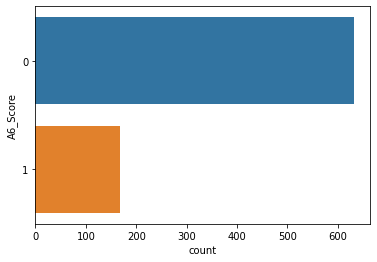

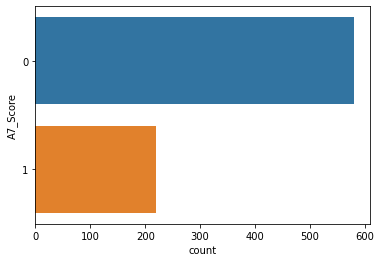

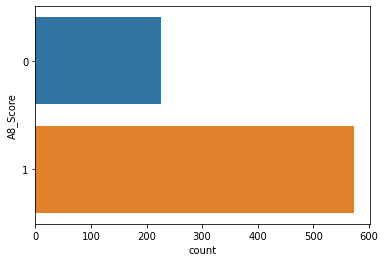

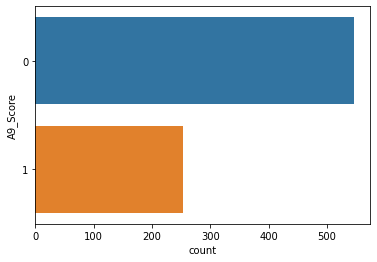

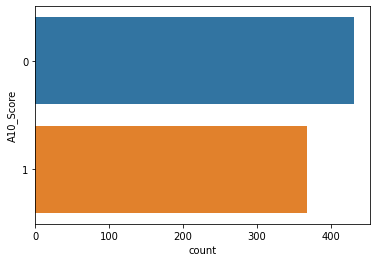

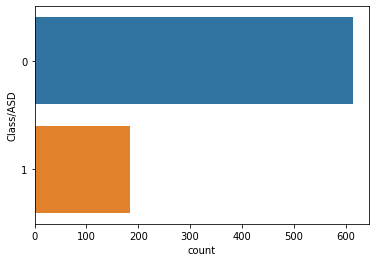

In [16]:
for column in train.select_dtypes(include='int64'):
    if train[column].nunique() <= 10:
        sns.countplot(y=column, data=train)
        plt.show()

### Observations

>*From the Autism Spectrum Quotient, A1-A10 are answers to questions patients were asked. For A1, A7, A8 and A10 are answers to questions that patients were asked. 1 is the score for those who "definitely or slightly" agree and 0 is the score for those who "slightly or definitely" disagree.*

* A1_Score: We have more patients who agree than disagree.

* A7_Score: We have more patients who disagree than agree.

* A8_Score: We have more patients who agree than disagree.

* A10_Score: We have more patients who disagree than agree.

>*For A2, A3, A4, A5, A6 and A9, 0 is the score for patients who "definitely or slightly" agree and 1 for those who "sligthly or definitely" disagree.*

* A2_Score: We have more patients who agree than disagree.

* A3_Score: We have more patients who agree than disagree.

* A4_Score: We have more patients who agree than disagree.

* A5_Score: We have more patients who agree than disagree.

* A6_Score: We have more patient who agree than disagree.

* A9_Score: We have more patients who agree than disagreee

>*It is observed that all records in 2,3,4,5,6 and 9 all follow the same trend.*

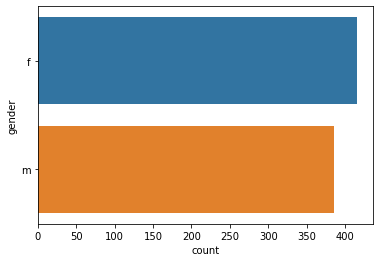

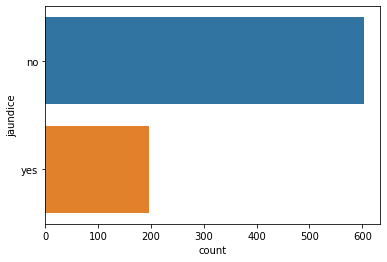

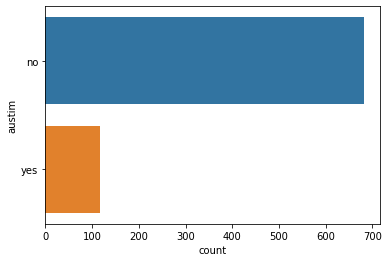

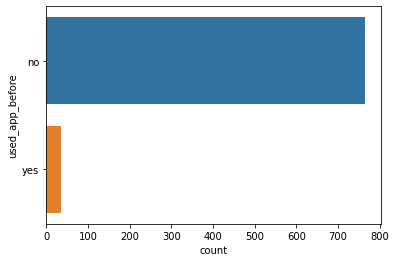

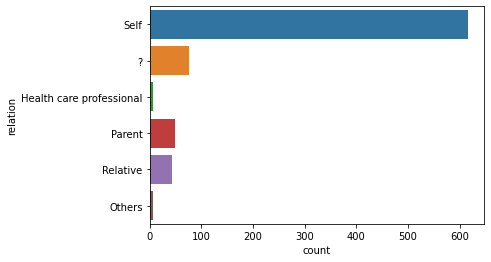

In [17]:
for column in train.select_dtypes(include='object'):
    if train[column].nunique() <= 10:
        sns.countplot(y=column, data=train)
        plt.show()

#### Observations

* There are more female patients than male in our train data.

* The majority of the patients do not have Jaundice.

* The majority of the patients' close relatives do not have autism.

* The majority of the patients have not used the screening app before.

* Individual representations are mostly prevalent in the records.

>*The chart below shows the top 10 countries and the number of patients from each of the countries as recorded in the dataset. It is obvious most of the patients are from USA.*

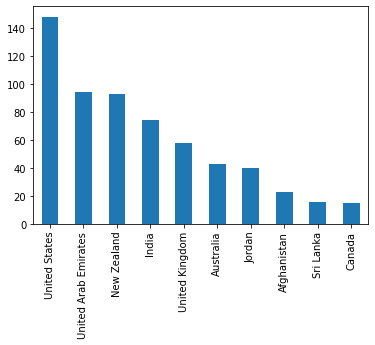

In [18]:
train['contry_of_res'].value_counts()[:10].plot(kind='bar')
plt.show()

>*The chart below shows the minimum age - 9.56, the median age - 25.47 and the highest age recorded - 72.40.  The maximum, minimum and median results are 13.39, -2.59 and 6.89 respectively.* We observe some negative numbers in the result distribution. 

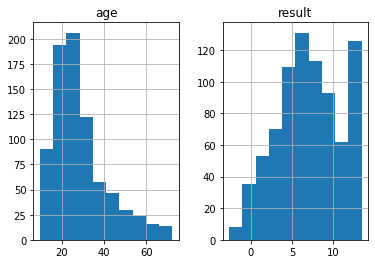

In [19]:
train[contineous_train_index].hist()
plt.show()

Investigating Results less than Zero

In [20]:
train[train['result'] < 0]['Class/ASD'].value_counts()

0    25
Name: Class/ASD, dtype: int64

>*All results below zero belong to the no autism class. If we remove them from the dataset, they will lower the ratio of the dominant class. This will be done later in the section on predictive analysis.*

Bivariate Analysis

>*The chart below shows we have more cases of females with autism*

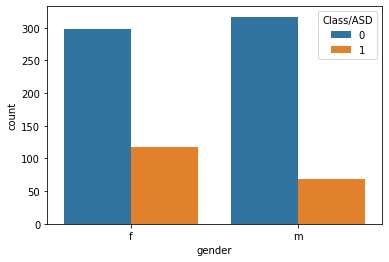

In [21]:
sns.countplot(x='gender', hue='Class/ASD', data=train)
plt.show()

>*The chart below shows that for patients who do not have family members diagnosed with autism, the actual count of such patients with autism are more than those who have family members with autism.*

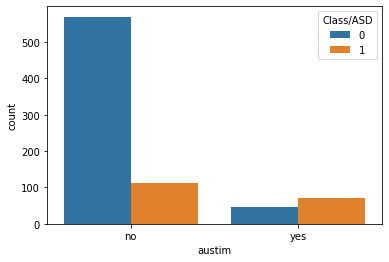

In [22]:
sns.countplot(x='austim', hue='Class/ASD', data=train)
plt.show()

>*The chart below shows we have some sort of balance in the gender of people who do not have family members diagnosed with Autism. Female patients have more relatives with autism than male.*

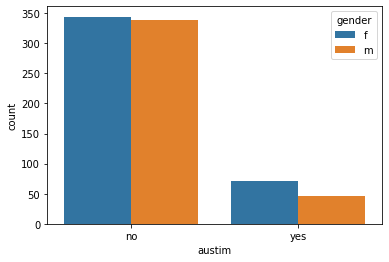

In [23]:
sns.countplot(x='austim', hue='gender', data=train)
plt.show()

>*The scatter plot below shows we don't have much linear relationship between age and result.*

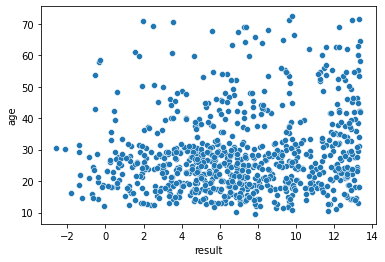

In [24]:
sns.scatterplot(y='age', x='result', data=train)
plt.show()

>*The chart below shows that there is very low percenatage of patients with Autism when results are less than 10, irrespective of the age. Also, there is very high percentage of patients with Autism when results are greater than 10 irrespective of the age.*

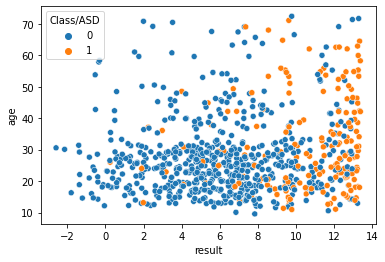

In [25]:
sns.scatterplot(y='age', x='result',hue='Class/ASD', data=train)
plt.show()

>*The chart below shows that the result of those with Autism are higher than those without.*

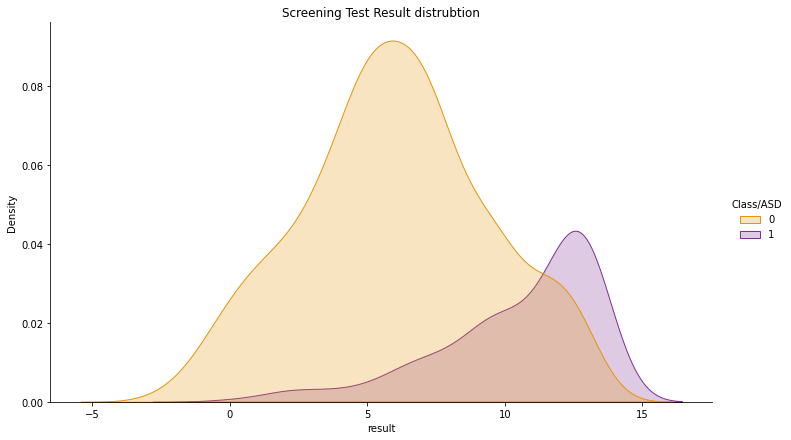

In [26]:
sns.displot(data=train,x='result',hue="Class/ASD" ,kind="kde", palette = "CMRmap_r",fill=True,height=6, aspect=1.7) ;
plt.title("Screening Test Result distrubtion")
plt.show()

>*The chart below shows that the age distribution of those without Autism is lower than those with Autism.*

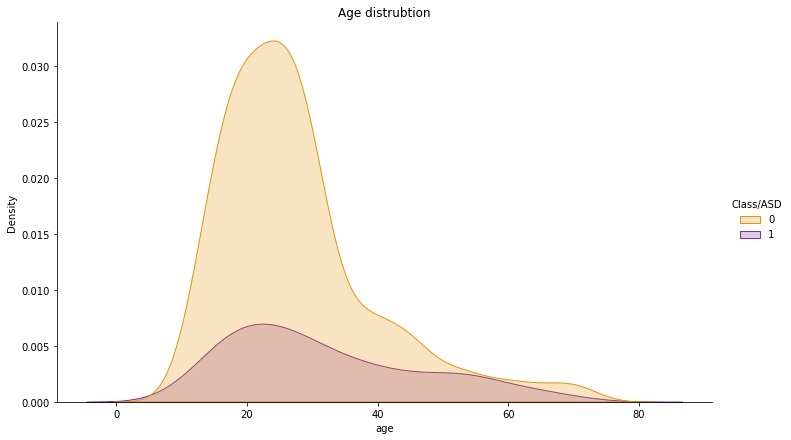

In [27]:
sns.displot(data=train,x='age',hue="Class/ASD" ,kind="kde", palette = "CMRmap_r",fill=True,height=6, aspect=1.7) ;
plt.title("Age distrubtion")
plt.show()

Diagnostic Analysis

Diagnostic analytics is the process of using data to determine the causes of trends and correlations between variables. It can be viewed as a logical next step after using descriptive analytics to identify trends.

In this section, we'll look at how different category variables relate to whether a patient has autism or not by utilizing the Chi-Square method.

**Note: Finding relationships between categorical data via correlation is one of data science's pitfalls.**

##### Formulating our hypothesis

H0 - The features do not have significant effect on the Autism class.

H1 - The features checked have significant effect on the Autism class.

If the p-value is > 0.05, it means the features do not have significant effect on Autism class and If the p-value is < 0.05, it means the features have a significant effect on the Autism class.

In [28]:
#The selected features are listed below
cat_col = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'Class/ASD']

In [29]:
X = train[cat_col].drop('Class/ASD', axis=1)
y = train['Class/ASD'] #target/independent variable

In [30]:
f_score=chi2(X,y)   #returns f score and p value 
f_score

(array([ 28.08774   ,  82.75773068, 164.0296279 , 123.06344428,
         87.28962709, 186.35609598,  90.494446  ,  10.84253949,
        158.73100991,  83.47841373]),
 array([1.15937991e-07, 9.27523505e-20, 1.49035356e-37, 1.35060416e-28,
        9.37382341e-21, 1.98498027e-42, 1.85496864e-21, 9.91945993e-04,
        2.14246673e-36, 6.44155292e-20]))

In [31]:
p_value=pd.Series(f_score[1],index=X.columns)

In [32]:
p_value.sort_values(ascending=True,inplace=True)

In [33]:
p_value

A6_Score     1.984980e-42
A3_Score     1.490354e-37
A9_Score     2.142467e-36
A4_Score     1.350604e-28
A7_Score     1.854969e-21
A5_Score     9.373823e-21
A10_Score    6.441553e-20
A2_Score     9.275235e-20
A1_Score     1.159380e-07
A8_Score     9.919460e-04
dtype: float64

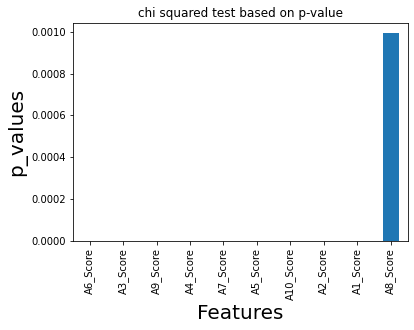

In [34]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test based on p-value")
plt.show()

>*All the categorical features selected have p-value < 0.05. Hence, we accept H1.*

In [35]:
# A list of other categorical variables in the dataset
cate_col = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',   
           'used_app_before', 'relation']

In [36]:
#Function for testing for the significance of other categorical variables using a significance level
def significance_test(x, y, z):
  pd.crosstab(train[x], train[y], margins = True)
  x_class = pd.crosstab(train[x], train[y], margins=True)
  x_class_val = np.array([x_class.iloc[0].values, x_class.iloc[1].values])
  stat, p, dof, expected_value = chi2_contingency(x_class_val)
  significance_level = z
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else: 
    print('ACCEPT NULL HYPOTHESIS')

In [37]:
#testing for the significane of gender using 0.05
significance_test("gender", "Class/ASD", 0.05)

p value: 0.0019715315978504106
Reject NULL HYPOTHESIS


In [38]:
#testing for the significant of austim using 0.05
significance_test("austim", "Class/ASD", 0.05)

p value: 1.9919920057937486e-25
Reject NULL HYPOTHESIS


In [39]:
#testing for the significance of ethnicity using 0.05
significance_test("ethnicity", "Class/ASD", 0.05)

p value: 0.7634700103427774
ACCEPT NULL HYPOTHESIS


In [40]:
#testing for the significance of jaundice using 0.05
significance_test("jaundice", "Class/ASD", 0.05)

p value: 4.763481119868074e-07
Reject NULL HYPOTHESIS


In [41]:
#testing for the significance of country of residence using 0.05
significance_test("contry_of_res", "Class/ASD", 0.05)

p value: 0.9098113957113441
ACCEPT NULL HYPOTHESIS


In [42]:
#testing for the significance of used_app_before using 0.05
significance_test("used_app_before", "Class/ASD", 0.05)

p value: 0.9043571248254012
ACCEPT NULL HYPOTHESIS


In [43]:
#testing for the significance of relation using 0.05
significance_test("relation", "Class/ASD", 0.05)

p value: 0.9110783456452753
ACCEPT NULL HYPOTHESIS


Observation

>*We can accept the alternative hypothesis (H1) for gender and the target variable (class) at 0.002 p-value. 
Family autism and Jaundice and the target variable (class) have significant effect on each other since their p-value is less than 0.05. For the other categorical features like ethnicity, contry_of_res and relation that do not have statistical significance with the target variable since their p-values are greater than 0.05, we must note that the interaction of these features might have a good potential to better classify autism. Hence, we keep them as predictors for modelling except for contry_of_res because of high cardinality effect. A categorical feature is said to possess high cardinality when there are too many of these unique values. One-Hot Encoding becomes a big problem in such a case since we have a separate column for each unique value (indicating its presence or absence) in the categorical variable.*

***Testing for the significance level of other categorical variables using a significance level of 0.01***

In [44]:
#testing for the significane of gender using 0.01
significance_test("gender", "Class/ASD", 0.01)

p value: 0.0019715315978504106
Reject NULL HYPOTHESIS


In [45]:
#testing for the significant of austim using 0.01
significance_test("austim", "Class/ASD", 0.01)

p value: 1.9919920057937486e-25
Reject NULL HYPOTHESIS


In [46]:
#testing for the significance of ethnicity using 0.01
significance_test("ethnicity", "Class/ASD", 0.01)

p value: 0.7634700103427774
ACCEPT NULL HYPOTHESIS


In [47]:
#testing for the significance of jaundice using 0.01
significance_test("jaundice", "Class/ASD", 0.01)

p value: 4.763481119868074e-07
Reject NULL HYPOTHESIS


In [48]:
#testing for the significance of country of residence using 0.01
significance_test("contry_of_res", "Class/ASD", 0.01)

p value: 0.9098113957113441
ACCEPT NULL HYPOTHESIS


In [49]:
#testing for the significance of used_app_before using 0.01
significance_test("used_app_before", "Class/ASD", 0.01)

p value: 0.9043571248254012
ACCEPT NULL HYPOTHESIS


In [50]:
#testing for the significance of relation using 0.01
significance_test("relation", "Class/ASD", 0.01)

p value: 0.9110783456452753
ACCEPT NULL HYPOTHESIS


>*With significance level 0.01, we get the same result as we did using a significance level of 0.05 i.e gender, austim and jaundice has a statistical significance with the target variable while ethnicity, contry_of_res, used_app_before and relation does not have statistical significance with the target variable(Class/ASD).*

#### Data preparation for modelling
We will use different algorithms to build a model that can predict whether a person has autism or not. This model can then be used on a test data to make predictions. For yes and no representations in our variables, we employ ordinal encoding. Consequenttly, yes == 1 and no == 0. We will also replace "?" in ethnicity and relation with others.

In [51]:
clean_jau = {'yes': 1, 'no': 0}

for ordinal_col in ['jaundice', 'austim', 'used_app_before']:
  train[ordinal_col] = train[ordinal_col].map(clean_jau)
  test[ordinal_col] =  test[ordinal_col].map(clean_jau)

In [52]:
#converting "?"" in relation and ethnicity to others as they do not represent known values, keeping "Others" representation consistent and maintaining certain naming conventions
pipeline1 = [('?', 'Others'), ('others', 'Others'), ('Middle Eastern ', 'Middle_Eastern'), ('South Asian', 'South_Asian'), 
             ('Health care professional', 'Health_care_professional'), ('White-European', 'White_European')]
             
for old, new in pipeline1:
    train['ethnicity'] = train['ethnicity'].replace(old,new)
    test['ethnicity'] = test['ethnicity'].replace(old,new)
    train['relation'] = train['relation'].replace(old,new)
    test['relation'] = test['relation'].replace(old,new)

#### Checking the high cardinality features before transformation.

>*This section examines ethnicity, country of residence, and relation overlap in training and test data. We convert the data using nominal encoding (pd.get dummies) to make it more similar to the original data.*

In [53]:
print(len(set(list(train['ethnicity'])) - set(list(test['ethnicity']))))
print(len(set(list(train['relation'])) - set(list(test['relation']))))
print(len(set(list(train['contry_of_res'])) - set(list(test['contry_of_res']))))

0
0
19


>*If we use one-hot encoding for country_of_res, it will cause imbalance of representation in the train and test data and for this reason, we exclude it from our independent variables.*

In [54]:
#Apply nomimal encoding to gender, ethnicity and relation in our train and test data
train = pd.get_dummies(train, columns=['gender', 'ethnicity', 'relation'], drop_first=True)
test = pd.get_dummies(test, columns=['gender', 'ethnicity', 'relation'], drop_first=True)

#### Feature Selection
>*We drop the variables that are not needed for the modelling in the train and test set*

In [55]:
#Because of the high cardinality effect, we exclude contry_of_res from the variables to be used for modelling in our training and test data. We also exclude result to avoid data leakage.
train = train.drop(['contry_of_res', 'result'], axis = 'columns') 
test = test.drop(['ID', 'contry_of_res', 'result', 'age_desc'], axis = 'columns')

In [56]:
#Checking the shape of both train and test data before modelling
print(train.shape)
print(test.shape)

(800, 29)
(200, 28)


#### Building Machine Learning Model

The algorithms that will be used for building the model are: Logistic Regression, Support Vector Machine, Gaussian Naive Bayes (GaussianNB), Extra Trees Classifier, Random Forest Classifier, Decision Tree Classifier, Light Gradient Boosting Machine(LightGBM), Extreme Gradient Boosting(XGBoost) and CatBoost. An explanation of how each of the algorithms work is given below:

1. Logistic Regression: Logistic Regression is a classification technique used in machine learning. It uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, i.e. there could only be two possible classes (eg.: either the cancer is malignant or not). As a result, this technique is used while dealing with binary data.

2. Support Vector Machine(SVM): SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

3. Gaussian Naive Bayes (GaussianNB): It is a probabilistic classification algorithm based on applying Bayes' theorem with strong independence assumptions. In the context of classification, independence refers to the idea that the presence of one value of a feature does not influence the presence of another (unlike independence in probability theory). Naive refers to the use of an assumption that the features of an object are independent of one another. In the context of machine learning, naive Bayes classifiers are known to be highly expressive, scalable, and reasonably accurate, but their performance deteriorates rapidly with the growth of the training set. A number of features contribute to the success of naive Bayes classifiers. Most notably, they do not require any tuning of the parameters of the classification model, they scale well with the size of the training data set, and they can easily handle continuous features.

4. Extra-Trees Classifier. Extremely Randomized Trees, or Extra Trees for short, is an ensemble machine learning algorithm. Specifically, it is an ensemble of decision trees and is related to other ensembles of decision trees algorithms such as bootstrap aggregation (bagging) and random forest.
The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. Predictions are made by averaging the prediction of the decision trees in the case of regression or using majority voting in the case of classification.

5. Random Forest: It is an ensemble machine learning technique capable of performing both regression and classification tasks using multiple decision trees and a statistical technique called bagging. Bagging along with boosting are two of the most popular ensemble techniques which aim to tackle high variance and high bias. A RF instead of just averaging the prediction of trees; it uses two key concepts that give it the name random:
<br> a) Random sampling of training observations when building trees.
<br> b) Random subsets of features for splitting nodes.
<br> In other words, Random forest builds multiple decision trees and merge their predictions together to get a more accurate and stable prediction rather than relying on individual decision trees.

6. Decision Tree: It builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

7. LightGBM: It is a gradient boosting framework that makes use of tree based learning algorithms that is considered to be a very powerful algorithm when it comes to computation. It is considered to be a fast processing algorithm. While other algorithms trees grow horizontally, LightGBM algorithm grows vertically meaning it grows leaf-wise and other algorithms grow level-wise. LightGBM chooses the leaf with large loss to grow. It can lower down more loss than a level wise algorithm when growing the same leaf.

8. XGBoost: It is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models. When using gradient boosting for regression, the weak learners are regression trees, and each regression tree maps an input data point to one of its leafs that contains a continuous score. XGBoost minimizes a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between the predicted and target outputs) and a penalty term for model complexity (in other words, the regression tree functions). The training proceeds iteratively, adding new trees that predict the residuals or errors of prior trees that are then combined with previous trees to make the final prediction. It's called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

9. CatBoost: CatBoost builds upon the theory of decision trees and gradient boosting. The main idea of boosting is to sequentially combine many weak models (a model performing slightly better than random chance) and thus through greedy search create a strong competitive predictive model. Because gradient boosting fits the decision trees sequentially, the fitted trees will learn from the mistakes of former trees and hence reduce the errors. This process of adding a new function to existing ones is continued until the selected loss function is no longer minimized. In the growing procedure of the decision trees, CatBoost does not follow similar gradient boosting models. Instead, CatBoost grows oblivious trees, which means that the trees are grown by imposing the rule that all nodes at the same level, test the same predictor with the same condition, and hence an index of a leaf can be calculated with bitwise operations. The oblivious tree procedure allows for a simple fitting scheme and efficiency on CPUs, while the tree structure operates as a regularization to find an optimal solution and avoid overfitting.

In [57]:
X = train.drop('Class/ASD', axis = 'columns') #Independent Variables
y = train['Class/ASD'] #Dependent Variable

In [58]:
# Separating the 80% data for training data and 20% for validation data
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, random_state = 0, stratify=y)

>*The validation set serves as a more objective ground than the training set to assess predictive accuracy. This is because records in the validation set are more similar to the future records to be predicted, in the sense that they are not used to select predictors or to estimate the model parameters. Models are trained on the tranining set, applied to the validation set, and measures of accuracy then use the prediction errors on that validation set.*

In [59]:
#checking the dimensions of the training and validation sets
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_valid{}'.format(X_valid.shape))
print('Shape of the y_valid {}'.format(y_valid.shape))

Shape of the X_train (640, 28)
Shape of the y_train (640,)
Shape of the X_valid(160, 28)
Shape of the y_valid (160,)


In [60]:
algos = [LogisticRegression(), 
         SVC(kernel='linear', random_state = 0, probability=True),
         GaussianNB(),
         ExtraTreeClassifier(max_depth = 4, random_state = 0),
         RandomForestClassifier(max_depth = 4,n_estimators = 1000, max_features='auto', class_weight='balanced', random_state = 0),
         DecisionTreeClassifier(max_depth = 4, random_state = 0),
         CatBoostClassifier(eval_metric = 'AUC', metric_period = 20, logging_level='Silent', random_state = 0),
         LGBMClassifier(n_estimators = 500, random_state = 0),
         XGBClassifier(max_depth = 4, n_estimators = 500, random_state = 0),]

names = ['Logistic Regression','SVC','Guassian','Extra Trees','Random Forest','Decision Tree','Catboost', 'LightGBM', 'XGBoost']
roc_list = []

In [61]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_valid)[:,1]
    score= roc_auc_score(y_valid,y_pred)
    roc_list.append(score)

In [62]:
evaluation = pd.DataFrame({'Model': names,
                           'AUC Score': roc_list})

In [63]:
evaluation = evaluation.sort_values(by='AUC Score', ascending=False)

In [64]:
evaluation

,Model,AUC Score
4,Random Forest,0.925731
1,SVC,0.923973
0,Logistic Regression,0.923533
6,Catboost,0.912766
3,Extra Trees,0.907053
2,Guassian,0.880026
5,Decision Tree,0.877499
7,LightGBM,0.876291
8,XGBoost,0.874313


AUC represents the probability that a random positive (autistic in this case) example is positioned to the right of a random negative (non autistic) example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:
<br>
<br> a) AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
<br> b) AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

>*From the AUC scores shown above, the Random Forest Algorithm has the best performance on the validation set of our model while XGBoost has the least performance.*

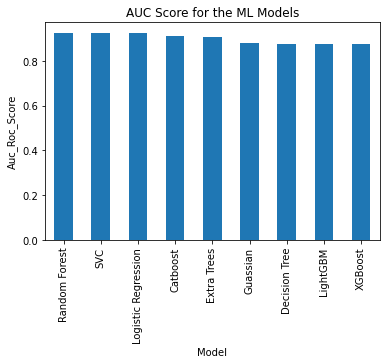

In [65]:
ax = evaluation.plot.bar(x='Model', y='AUC Score', legend= False)
ax.set_title('AUC Score for the ML Models')
ax.set_xlabel('Model')
ax.set_ylabel('Auc_Roc_Score')
plt.show()

Plotting the ROC Curve for Each Model
>*A more popular method for plotting the specificity and sensitivity of a model is through ROC (Receiver Operating Characteristics) curves. Starting from the lower left, the ROC curve plots the pairs {sensitivity, specificity} as the cut-off value descends from 1 to 0. (A typical alternative presentation is to plot 1-specificity on the x-axis, which allows 0 to be placed on the left end of the axis, and 1 on the right.) Better performance is reflected by curves that are closer to top-left corner. The comparison curve is a diagonal, which reflects the average performance of a guessing classifier that has no information about the predictors or outcome variables. This guessing classifier guesses that a proportion α of the records is 1's and therefore assigns each record an equal probability P(Y = 1) = α. In this case, on the average, a proportion α of the 1's will be correctly classified (Sensitivity = α), and a proportion α of the 0s will be correctly classified (1 - Specificity = α). As we increase the cutoff value from 0 to 1, we get the diagonal line Sensitivity = 1 - Specificity: Note that the naive rule is one point on this diagonal line, where α = proportion of actual 1's. A common metric to summarize an ROC curve is "area under the curve (AUC), "which ranges from 1 (perfect discrimination between classes) to 0.5 (no better than random guessing). The ROC curve for the autistic/nonautistic cases and its correspong AUC for each of the models are shown below:*

ROC AUC for Each of the Models

In [66]:
#Function for plotting the ROC AUC curve for each of the models
def curve_auc(x, title):
  fpr, tpr, threshold = roc_curve(y_valid, algos[x].predict_proba(X_valid)[:,1])
  roc_auc = metrics.auc(fpr, tpr)

  plt.title(title) 
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


Logistic Regression ROC

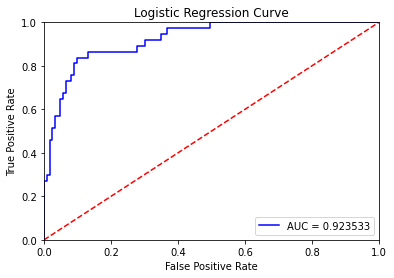

In [67]:
curve_auc(0, title = 'Logistic Regression Curve')

Support Vector Classifier

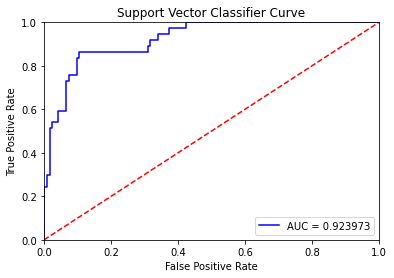

In [68]:
curve_auc(1, title = 'Support Vector Classifier Curve')

Gaussian NB

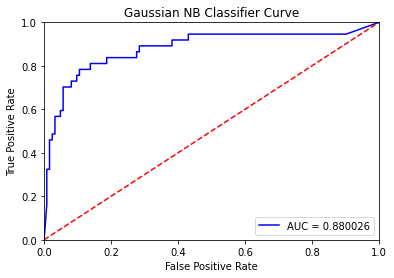

In [69]:
curve_auc(2, title = 'Gaussian NB Classifier Curve')

Extra Trees Classifier

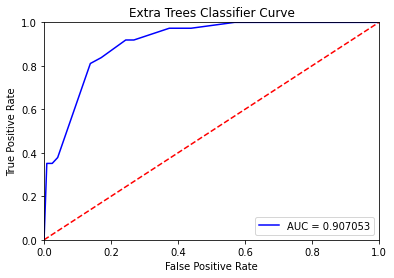

In [70]:
curve_auc(3, title = 'Extra Trees Classifier Curve')

Random Forest Classifier Curve

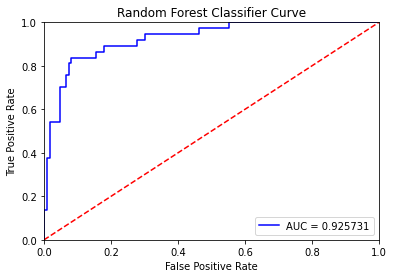

In [71]:
curve_auc(4, title = 'Random Forest Classifier Curve')

Decision Tree Classifier

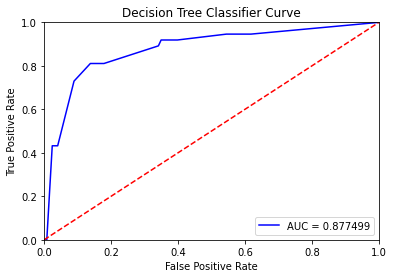

In [72]:
curve_auc(5, title = 'Decision Tree Classifier Curve')

Catboost Classifier

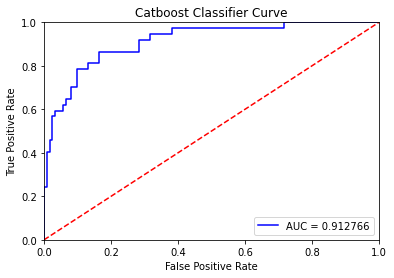

In [73]:
curve_auc(6, title = 'Catboost Classifier Curve')

LightGBM Classifier

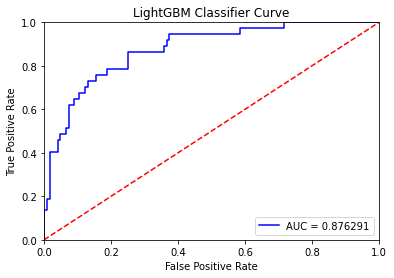

In [74]:
curve_auc(7, title ='LightGBM Classifier Curve')

XGBoost Classifier

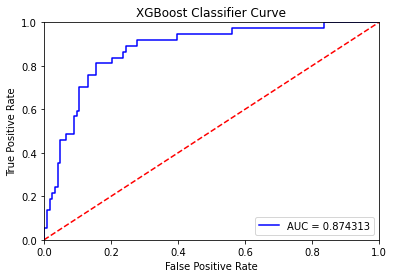

In [75]:
curve_auc(8, title = 'XGBoost Classifier Curve')

### The Confusion (Classification) Matrix
>*In practice, most accuracy measures are derived from the confusion matrix, also called classification matrix. This matrix summarizes the correct and incorrect classifications that a classifier produced for a certain dataset. Rows and columns of the confusion matrix correspond to the predicted and true (actual) classes, respectively. We generate a classification (confusion) matrix for a two-class (0/1) problem resulting from applying different classifiers to the training data. The two diagonal cells (upper left, lower right) give the number of correct classifications, where the predicted class coincides with the actual class of the record. The off-diagonal cells give counts of misclassification. The lower left cell gives the number of class 1 members that were misclassified as 0's. Similarly, the upper right cell gives the number of class 0 members that were misclassified as 1's. The confusion matrix gives estimates of the true classification and misclassification rates. Of course, these are estimates and they can be incorrect, but if we have a large enough dataset, our estimates will be reliable. To obtain an honest estimate of future classification error, we use the confusion matrix that is computed from the validation data. In other words, we first partition the data into training and validation sets by random selection of records. We then construct a classifier using the training data, and then apply it to the validation data. This will yield the predicted classifications for records in the validation set. We then summarize these classifications in a confusion matrix. Although we can summarize our results in a confusion matrix for training data as well, the resulting confusion matrix is not useful for getting an honest estimate of the misclassification rate for new data due to the danger of overfitting.*


#### Getting the Classification Summary and Confusion Matrix for Each of the Models.

Confusison Matrix with Accuracy Score for Logistic Regression

In [76]:
logistic_model_pred = algos[0].predict(X_valid)
classificationSummary(y_valid, logistic_model_pred)

Confusion Matrix (Accuracy 0.8875)

       Prediction
Actual   0   1
     0 112  11
     1   7  30


>*The Classification Accuracy for the Logistic Regression Model is 88.75%*

Confusion Matrix with Accuracy Score for Support Vector Classifier

In [77]:
svm_model_pred = algos[1].predict(X_valid)
classificationSummary(y_valid, svm_model_pred)

Confusion Matrix (Accuracy 0.8688)

       Prediction
Actual   0   1
     0 111  12
     1   9  28


>*The Classification Accuracy for the Support Vector Classifier Model is 86.88%*

Confusion Matrix with Accuracy Score for the Gaussian Classifier

In [78]:
gau_model_pred = algos[2].predict(X_valid)
classificationSummary(y_valid, gau_model_pred)

Confusion Matrix (Accuracy 0.6500)

       Prediction
Actual  0  1
     0 70 53
     1  3 34


>*The Classification Accuracy for the Gaussian Vector Classifier Model is 65.00%*

Confusion Matrix with Accuracy Score for Extra Tree Classifier

In [79]:
etc_model_pred = algos[3].predict(X_valid)
classificationSummary(y_valid, etc_model_pred)

Confusion Matrix (Accuracy 0.8500)

       Prediction
Actual   0   1
     0 106  17
     1   7  30


>*The Classification Accuracy for the Extra Trees Classifier Model is 85.00%*

Confusion Matrix with Accuracy Score for Random Forest Classifier

In [80]:
rfc_model_pred = algos[4].predict(X_valid)
classificationSummary(y_valid, rfc_model_pred)

Confusion Matrix (Accuracy 0.8438)

       Prediction
Actual   0   1
     0 104  19
     1   6  31


>*The Classification Accuracy for the Random Forest Classifer Model is 84.38%*

Confusion Matrix with Accuracy Score for Decision Tree Classifier

In [81]:
dtc_model_pred = algos[5].predict(X_valid)
classificationSummary(y_valid, dtc_model_pred)

Confusion Matrix (Accuracy 0.8500)

       Prediction
Actual   0   1
     0 106  17
     1   7  30


>*The Classification Accuracy for the Decision Tree Classifier Model is 85.00%*

Confusion Matrix with Accuracy Score for CatBoost Classifier

In [82]:
cat_model_pred = algos[6].predict(X_valid)
classificationSummary(y_valid, cat_model_pred)

Confusion Matrix (Accuracy 0.8625)

       Prediction
Actual   0   1
     0 111  12
     1  10  27


>*The Classification Accuracy for the CatBoost Classifier Model is 86.25%*

Confusion Matrix with Accuracy Score for LightGBM Classifier

In [83]:
lgb_model_pred = algos[7].predict(X_valid)
classificationSummary(y_valid, lgb_model_pred)

Confusion Matrix (Accuracy 0.8438)

       Prediction
Actual   0   1
     0 110  13
     1  12  25


>*The Classification Accuracy for the LightGBM Classifier Model is 84.38%*

Confusion Matrix with Accuracy Score for XGBoost

In [84]:
xgb_model_pred = algos[8].predict(X_valid)
classificationSummary(y_valid, xgb_model_pred)

Confusion Matrix (Accuracy 0.8438)

       Prediction
Actual   0   1
     0 110  13
     1  12  25


>*The Classification Accuracy for the XGBoost Classifier Model is 84.38%*

>*The Logistic Regression has the highest accuracy (88.75%) but in medical research, there's usually a focus on the model that have high specificity(Recall) as highest classification score doesn't necessarily translate to a better performance. In this case, we go with Random Forest Classifier with classification accuracy of 84.38% and 0.925731 AUC Score. In a real-life scenario especially in the health sector, we take care of the rare class using metrics like ROC AUC.*


***Hyper-Parameter Optimization for the Random Forest Classifier***

>*We'll apply hyperparameter optimization using Random Search on the Random Forest Classifier for better performance and then we re-evaluate its performance using accuracy.*

In [85]:
#using randomized search to find optimized tree:
max_depth = list(range(5,15)) + [None]
n_estimators = [200, 400, 600, 700, 800, 900, 1000, 1200]
min_samples_split = range(5, 25)
min_samples_leaf = range(2, 25)
param_dist = {"max_depth": max_depth,
              "n_estimators": n_estimators,
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf}

tree = RandomForestClassifier(random_state=0)
tree_cv = RandomizedSearchCV(tree, param_dist, n_jobs = -1, cv = 10, verbose = 1, n_iter = 100, random_state=0)
tree_cv.fit(X_train,y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, None],
                                        'min_samples_leaf': range(2, 25),
                                        'min_samples_split': range(5, 25),
                                        'n_estimators': [200, 400, 600, 700,
                                                         800, 900, 1000,
                                                         1200]},
                   random_state=0, verbose=1)

In [86]:
print('Tuned RF Classifier Parameters:', tree_cv.best_params_)

Tuned RF Classifier Parameters: {'n_estimators': 1000, 'min_samples_split': 13, 'min_samples_leaf': 6, 'max_depth': 9}


>*With Randomized Search CV, the hyper optimised parameters for the Random Forest Classifier are:  n_estimators is 1000, min_samples_split is 13, min_samples_leaf is 6, and max_depth is 9*

In [87]:
#Getting the accuracy score for the optimised model
rfc_opt_model = tree_cv.predict(X_valid)
classificationSummary(y_valid, rfc_opt_model)

Confusion Matrix (Accuracy 0.9000)

       Prediction
Actual   0   1
     0 117   6
     1  10  27


>*The classification matrix below shows that the new accuracy score for the optimised model is 90%*

Predicting with the Optimised Random Forest Model

>*We fit the algorithm (using the optimised parameters) on all the training data*

In [88]:
X = train.drop('Class/ASD', axis = 1)
y = train['Class/ASD']

In [89]:
rf = RandomForestClassifier(max_depth = 9, n_estimators = 1000, min_samples_leaf = 6, min_samples_split = 13) #we use the parameters derived from the random search

In [90]:
rf.fit(X, y)

RandomForestClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=13,
                       n_estimators=1000)

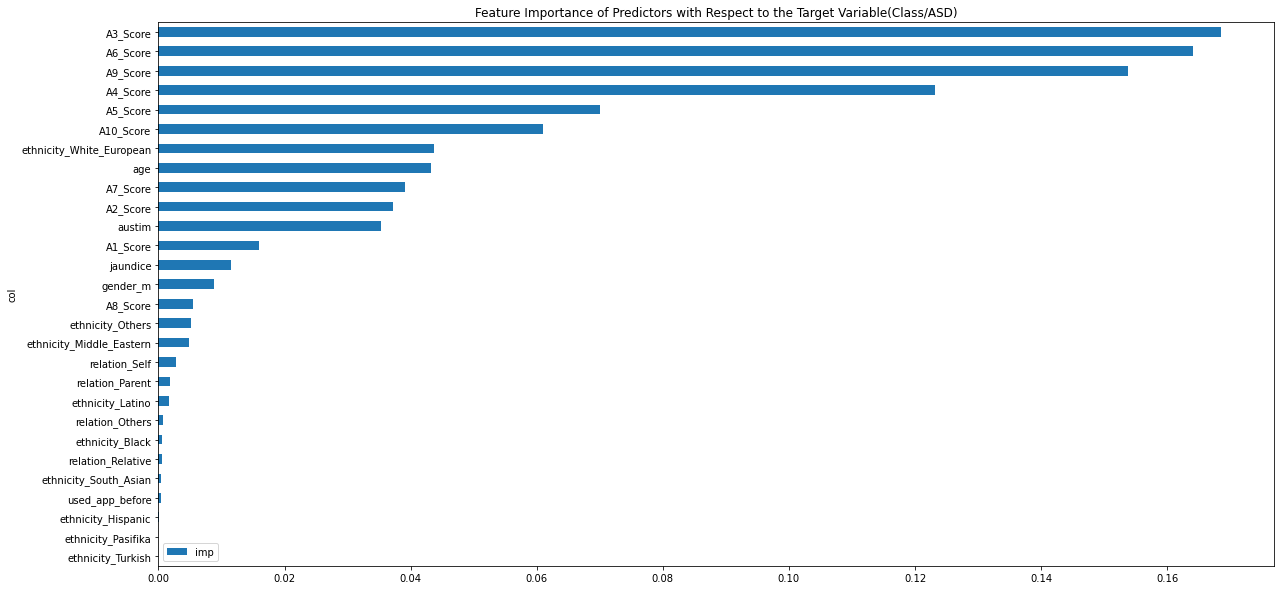

In [91]:
fea_imp = pd.DataFrame({'imp':rf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-36:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.title('Feature Importance of Predictors with Respect to the Target Variable(Class/ASD)')
plt.show()

>*The feature importance chart above shows that A3_Score variable is the most important feature in predicting the target variable using the Optimised Random Forest Model while ethnicity_Turkish is the least important feature.*

Running a Prediction with the Test Data

>*For the test data, we generate the propensities for classification for each of the records. The first step in most classification algorithms is to estimate the probability that a record belongs to each of the classes. These probabilities are also called propensities. Propensities are typically used either as an interim step for generating predicted class membership (classification), or for rank-ordering the records by their probability of belonging to a class of interest. If overall classification accuracy (involving all the classes) is of interest, the record can be assigned to the class with the highest probability. In the autism test record, a single class (autistic) is of special interest, so we will focus on that particular class. The default cutoff value in two-class classifiers is 0.5. Thus, if the probability of a record being a class Autistic member is greater than 0.5, that record is classified as Autistic. It is possible, however, to use a cutoff that is either higher or lower than 0.5. A cutoff greater than 0.5 will end up classifiying fewer records as Autistic, whereas a cutoff less than 0.5 will end up classifying more records as Autistic. Typically, the misclassification rate will rise in either case.*

In [92]:
test_predictions = rf.predict_proba(test)[:, 1]
test_predictions = pd.DataFrame(test_predictions)
test_predictions.columns = ['Probability of Class "Autism"']
test_predictions['Actual Class'] = np.where(test_predictions['Probability of Class "Autism"'] < 0.5, 'Non Autistic', 'Autistic') #using a default cutoff value of 0.5

In [93]:
test_predictions.head() #first five records of the test set 

,"Probability of Class ""Autism""",Actual Class
0,0.035767,Non Autistic
1,0.058700,Non Autistic
2,0.186087,Non Autistic
3,0.364784,Non Autistic
4,0.257529,Non Autistic


In [94]:
test_predictions['Actual Class'].value_counts()

Non Autistic    163
Autistic         37
Name: Actual Class, dtype: int64

>*Out of the 200 records in our test set, our model was able to classify 37 individuals as those with Autism and 163 as those without autism using a cufoff value of 0.5. In a real-life scenario, it is possible to say we have more healthy people than those with autism.*

***Saving the best model as a pickle file to be used for deployment using streamlit sharing***


>*Streamlit is a web application framework that helps to build and develop Python-based web applications that can be used to share analytics results, build complex interactive experiences, and illustrate new machine learning models. On top of that, developing and deploying Streamlit apps is incredibly fast and realiable, often turning application development time from days into hours. The optimized random forest algorithm is converted into a pickle file and will be used for the machine learning model that will predict whether a patient is autistic or not.*

In [95]:
#code for converting the best model (optimised random forest classifier) to a pickle file. This code has been executed to produce the pickle file. Hence, the comment below.
'''
autism_pickle = open('autism_classification_model.pickle', 'wb')
pickle.dump(tree_cv, autism_pickle)
autism_pickle.close()
'''

"\nautism_pickle = open('autism_classification_model.pickle', 'wb')\npickle.dump(tree_cv, autism_pickle)\nautism_pickle.close()\n"

>*The codes for the model deployment can be found in the file titled autism_model_deployment.py*